In [0]:
in order to reproduce experimental # standard imports
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.spatial.distance import cdist,pdist,squareform
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN

from IPython import display
%matplotlib inline

In [0]:
import myclusters2
import mymetrics2

# RMSD vs USR with PAM / Density Peaks

using 10k frames from the DPAP-ACN trajectory

## PAM: Settings

number of clusters, iteration, restart and convergence

In [0]:
K = [k for k in range(2,20)]
nfeatures = 36
niter = 1000
restart = 15
conv = 1e-6

## RMSD

In [0]:
RawDist = np.loadtxt(\
"/run/media/g.mancini/09e994f6-73c1-425f-b9e7-19fb6b78e81d/perDaniele/dpap_acn/py_rmsd_10k_dpap_acn.dat")
RawDist.shape

(10001, 10001)

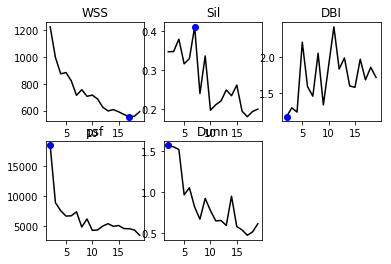

In [0]:
-

In [0]:
my_estimator = myclusters2.PAM(D=RawDist,X=None,K=2,niter=niter,nrun=restart,boot='random',conv=1e-5,metric='precomputed')
my_estimator.do_clustering()
myclusters = my_estimator.clusters
print("centroids",set(myclusters))

centroids {3597, 1933}


In [0]:
my_estimator = myclusters2.PAM(D=RawDist,X=None,K=5,niter=niter,nrun=restart,boot='random',conv=1e-5,metric='precomputed')
my_estimator.do_clustering()
myclusters = my_estimator.clusters
print("centroids",set(myclusters))

centroids {5246, 8049, 6642, 6372, 4054}


### USR / PAM for DPAP

In [0]:
usrdist = 1.0 - \
np.loadtxt("/run/media/g.mancini/09e994f6-73c1-425f-b9e7-19fb6b78e81d/perDaniele/dpap_acn/usrmat_10k_dpap_acn.dat")
usrdist.shape

(10001, 10001)

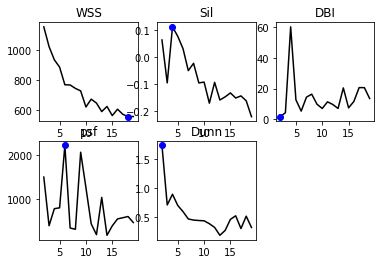

In [0]:
sil = list()
DBI = list()
psf = list()
Dunn= list()
WSS = list()

for k in K:
    my_estimator = myclusters2.PAM(D=RawDist,X=None,K=k,\
                                   niter=niter,nrun=restart,boot='random',conv=conv,metric='precomputed')
    my_estimator.do_clustering()
    myclusters = my_estimator.clusters
    WSS.append(my_estimator.inertia)
    
    myeval = mymetrics2.cluster_eval(metric='precomputed',clusters=myclusters,D=usrdist)
    DBI.append(myeval(noise="ignore",method="DBI"))
    Dunn.append(myeval(noise="ignore",method="Dunn",inter="allav",intra="allav"))
    psf.append(myeval(noise="ignore",method="psF",centroid=True)[0])
    sil.append(metrics.silhouette_score(usrdist,myclusters,metric='precomputed'))  

plt.figure()    

plt.subplot(231)
WSS = np.asarray(WSS); vmax = np.min(WSS); kmax = np.argmin(WSS)+2
plt.plot(K,WSS,'k',kmax, vmax, 'bo')
plt.title('WSS')

plt.subplot(232)
sil = np.asarray(sil); vmax = np.max(sil); kmax = np.argmax(sil)+2
plt.plot(K,sil,'k',kmax, vmax, 'bo')
plt.title('Sil')

plt.subplot(233)
DBI = np.asarray(DBI); vmax = np.min(DBI); kmax = np.argmin(DBI)+2
plt.plot(K,DBI,'k',kmax, vmax, 'bo')
plt.title('DBI')

plt.subplot(234)
psf = np.asarray(psf); vmax = np.max(psf); kmax = np.argmax(psf)+2
plt.plot(K,psf,'k',kmax, vmax, 'bo')
plt.title('psf')

plt.subplot(235)
Dunn = np.asarray(Dunn); vmax = np.max(Dunn); kmax = np.argmax(Dunn)+2
plt.plot(K,Dunn,'k',kmax, vmax, 'bo')
plt.title('Dunn')

plt.show()

In [0]:
my_estimator = myclusters2.PAM(D=usrdist,X=None,K=2,niter=niter,nrun=restart,boot='random',conv=1e-5,metric='precomputed')
my_estimator.do_clustering()
myclusters = my_estimator.clusters
print("centroids",set(myclusters))

centroids {2610, 1388}


In [0]:
my_estimator = myclusters2.PAM(D=usrdist,X=None,K=5,niter=niter,nrun=restart,boot='random',conv=1e-5,metric='precomputed')
my_estimator.do_clustering()
myclusters = my_estimator.clusters
print("centroids",set(myclusters))

centroids {6233, 6639, 6431, 133, 8455}


## Density Peaks

In [0]:
spacedef="precomputed"
usenoise="ignore"
percent = np.array((0.5,1.,1.5,2.,2.5,3.))
#percent = np.array((1.,1.5,1.75))
ndata = RawDist.shape[0]

Using raw RMSD matrix

############################

Determining cutoff using a % of neighbors= 0.5
Cutoff 0.0338498614728


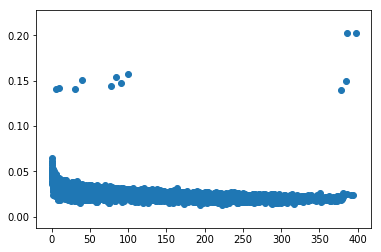


############################

Determining cutoff using a % of neighbors= 1.0
Cutoff 0.0376828163862


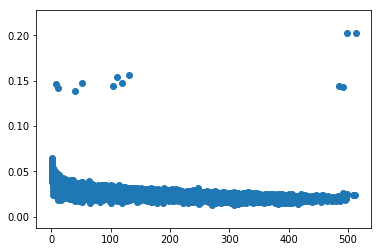


############################

Determining cutoff using a % of neighbors= 1.5
Cutoff 0.0404196754098


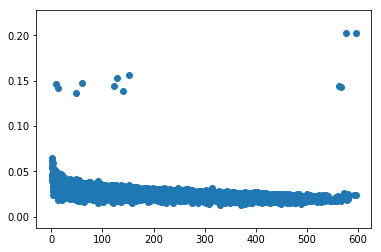


############################

Determining cutoff using a % of neighbors= 2.0
Cutoff 0.04268296808


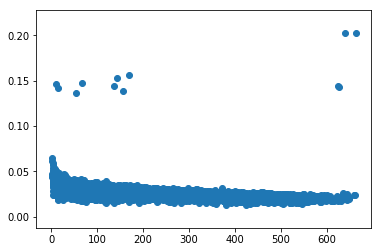


############################

Determining cutoff using a % of neighbors= 2.5
Cutoff 0.0446758829057


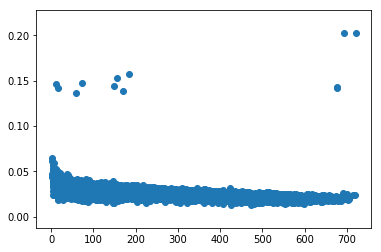


############################

Determining cutoff using a % of neighbors= 3.0
Cutoff 0.0464825630188


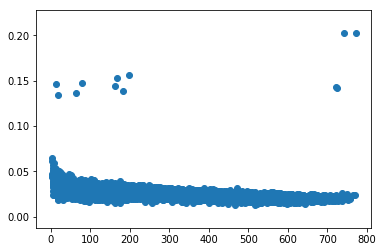

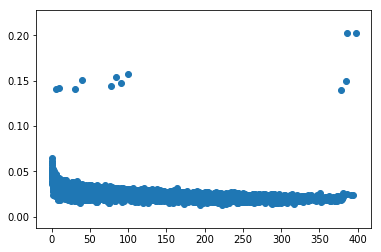

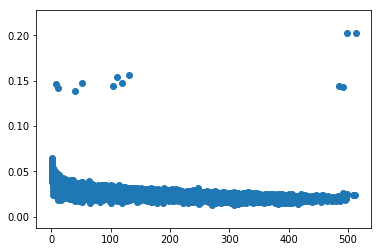

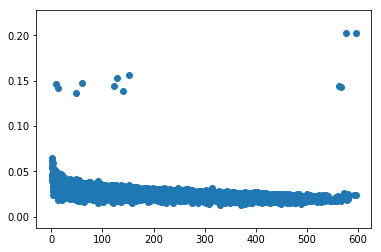

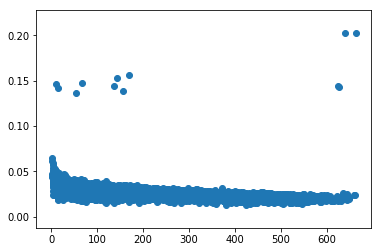

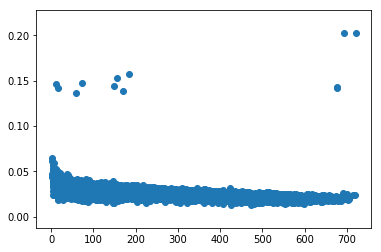

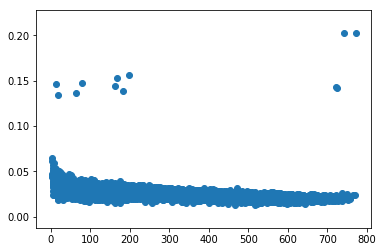

In [0]:
print("Using raw RMSD matrix")

for p in percent:
    fig = plt.figure()
    print("\n############################\n")
    ###############
    estimator = myclusters2.density_peaks(cutoff="auto",percent=p,metric="precomputed",\
                                     kernel="gaussian",D=RawDist)
    print("Cutoff",estimator.cutoff)
    rho,delta = estimator.decision_graph()
    plt.scatter(rho,delta)
    display.display(fig)

In [0]:
RMIN = 600
DELTA = 0.1
p = 3.0

In [0]:
estimator = myclusters2.density_peaks(cutoff="auto",percent=p,metric="precomputed",\
                                 kernel="gaussian",D=RawDist)
print("Cutoff",estimator.cutoff)
rho,delta = estimator.decision_graph()
centroids,points = estimator.get_centroids(rmin=RMIN,dmin=DELTA)
clusters = estimator.assign_points()

robust_clusters = estimator.create_halo()
halo = 0
for c in centroids:
    N = len(robust_clusters[robust_clusters==c])
    H = len(clusters[clusters==c]) - N
    halo = halo + H
    print("%d elements and %d HALO points found in cluster %d" % (N,H,c))        
norm = (ndata-halo)/ndata

Determining cutoff using a % of neighbors= 3.0
Cutoff 0.0464825630188
1137 elements and 707 HALO points found in cluster 3200
1181 elements and 1719 HALO points found in cluster 4702
1387 elements and 2041 HALO points found in cluster 5768
1046 elements and 783 HALO points found in cluster 7557


## USR

Using USR matrix

############################

Determining cutoff using a % of neighbors= 0.5
Cutoff 0.00012922283404


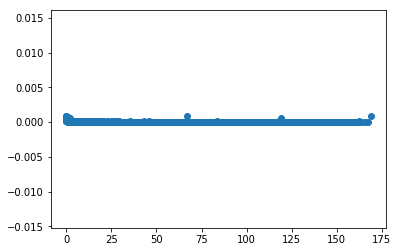


############################

Determining cutoff using a % of neighbors= 1.0
Cutoff 0.000192420950931


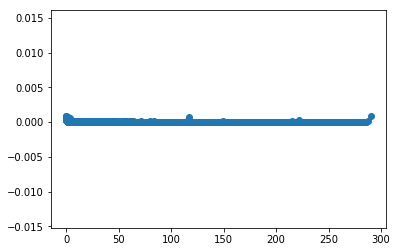


############################

Determining cutoff using a % of neighbors= 1.5
Cutoff 0.00024490971224


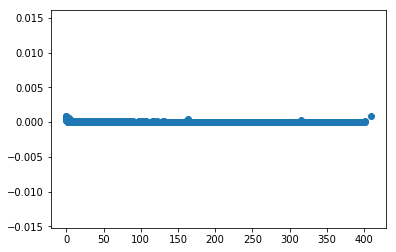


############################

Determining cutoff using a % of neighbors= 2.0
Cutoff 0.000291948678146


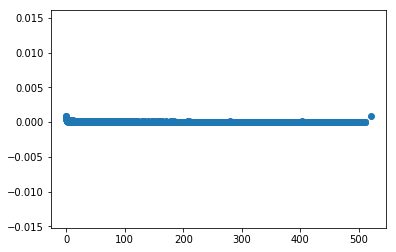


############################

Determining cutoff using a % of neighbors= 2.5
Cutoff 0.000335589019461


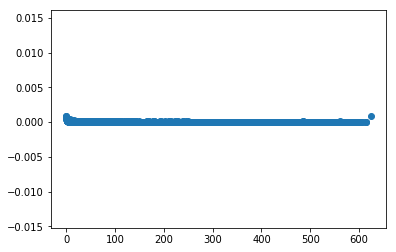


############################

Determining cutoff using a % of neighbors= 3.0
Cutoff 0.000377058796718


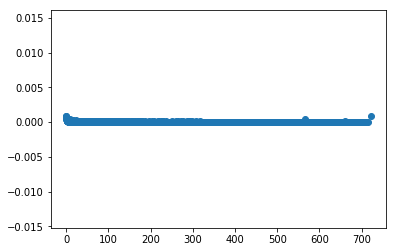

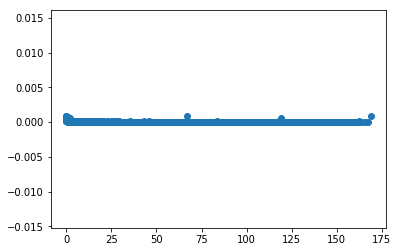

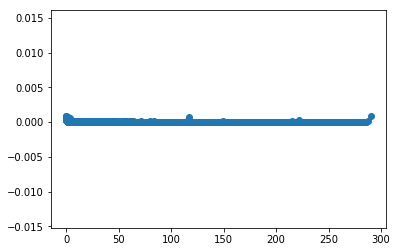

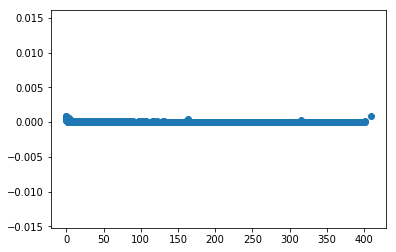

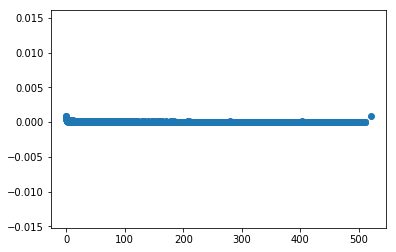

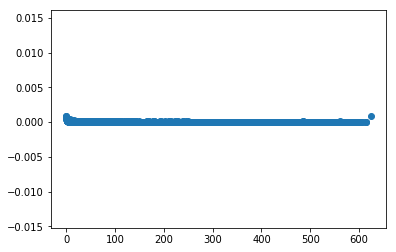

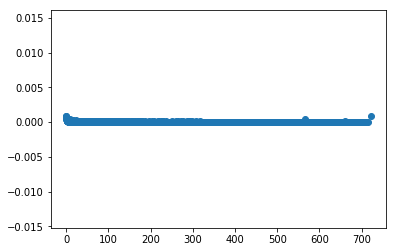

In [0]:
print("Using USR matrix")

for p in percent:
    fig = plt.figure()
    print("\n############################\n")
    ###############
    estimator = myclusters2.density_peaks(cutoff="auto",percent=p,metric="precomputed",\
                                     kernel="gaussian",D=usrdist)
    print("Cutoff",estimator.cutoff)
    rho,delta = estimator.decision_graph()
    plt.scatter(rho,delta)
    display.display(fig)

In [0]:
percent = np.array((0.04,0.08,0.16,0.32))

Using USR matrix

############################

Determining cutoff using a % of neighbors= 0.04
Cutoff 3.11441595993e-05


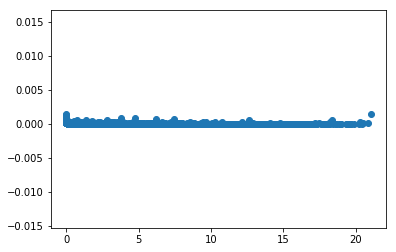


############################

Determining cutoff using a % of neighbors= 0.08
Cutoff 4.6942871168e-05


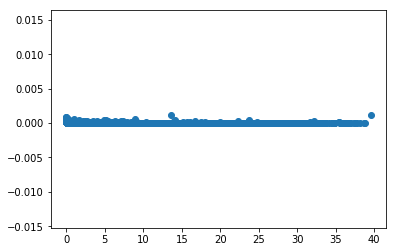


############################

Determining cutoff using a % of neighbors= 0.16
Cutoff 6.88505558619e-05


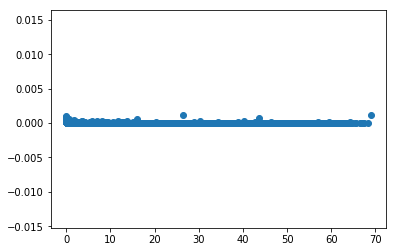


############################

Determining cutoff using a % of neighbors= 0.32
Cutoff 0.000100742066625


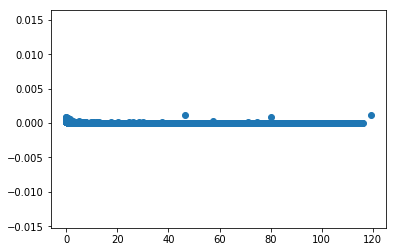

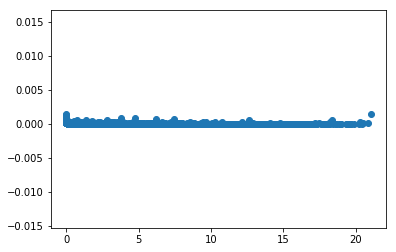

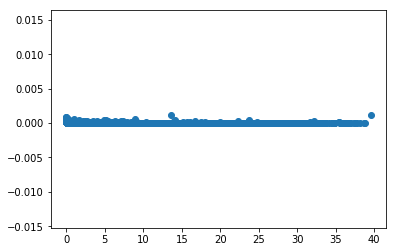

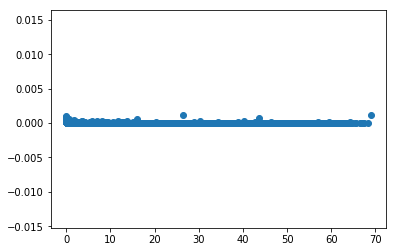

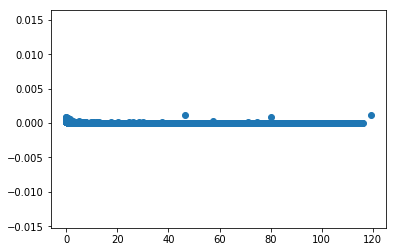

In [0]:
print("Using USR matrix")

for p in percent:
    fig = plt.figure()
    print("\n############################\n")
    ###############
    estimator = myclusters2.density_peaks(cutoff="auto",percent=p,metric="precomputed",\
                                     kernel="gaussian",D=usrdist)
    print("Cutoff",estimator.cutoff)
    rho,delta = estimator.decision_graph()
    plt.scatter(rho,delta)
    display.display(fig)

In [0]:
"""RMIN = 
DELTA = 
percent = """

In [0]:
"""estimator = myclusters2.density_peaks(cutoff="auto",percent=p,metric="precomputed",\
                                 kernel="gaussian",D=usrdist)
print("Cutoff",estimator.cutoff)
rho,delta = estimator.decision_graph()
centroids,points = estimator.get_centroids(rmin=RMIN,dmin=DELTA)
clusters = estimator.assign_points()

robust_clusters = estimator.create_halo()
halo = 0
for c in centroids:
    N = len(robust_clusters[robust_clusters==c])
    H = len(clusters[clusters==c]) - N
    halo = halo + H
    print("%d elements and %d HALO points found in cluster %d" % (N,H,c))        
norm = (ndata-halo)/ndata"""